**<h1 style="text-align:center"><font size = "15" >Q1</font></h1>**
***

## Importing Numpy, Pandas and MatPlotLib Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Q1(a)
## &emsp; Code up the perceptron algorithm described on slide 7 of Lecture 15 using the same notation asin the slides.
## &emsp;&emsp;Perceptron loss function :  
$
\Large L(w) = \sum_{n=1}^{N} max(0,-y_nw^Tx_n)
$
## &emsp;&emsp;Optimizing Using SGD : 
$ 
\Large g_n = \begin{cases}0, \;\;\text{if}\;\; y_nw^Tx_n \;>=\; 0 \\ -y_nx_n, \;\;\text{if}\;\; y_nw^Tx_n \;<\; 0\end{cases} 
$

In [220]:
#Defining the function perceptron to get optimal weight
def perceptron(x,y,learn_rate = 1,n_iter=5000, tol=1e-06):
    #Initializing w as 1
    w = np.ones(len(x.iloc[0]))
    
    for  i in range(n_iter):
        #Taking random samples of x and y
        ind_rand =np.random.randint(0,len(x))
        sam_x = np.array(x.iloc[ind_rand])
        sam_y = y[ind_rand]
        
        #Predicting value of y based on current x and w
        pred_y = np.dot(w,sam_x)
        
        #Calculating mistake 
        mis = sam_y*pred_y

        #Breaking out of the loop if mistake is less than tolerated value
        if np.all(np.abs(mis)) <= tol :
            break
        
        #If mistake less than zero then change the w
        if mis < 0 :
            w = w + learn_rate*(sam_y*sam_x)
        
    #Returning the optimized w
    return w

# Q1(b)
## &emsp;Write functions to make predictions using the algorithm for the banknotes dataset. Preprocess the dataset to handle missing and anomalous data.

In [221]:
bank_note_data = pd.read_csv("data_banknote_authentication.csv",header=None,names=["var","skew","curt","ent","class"])
bank_note_data

,var,skew,curt,ent,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [222]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var     1372 non-null   float64
 1   skew    1372 non-null   float64
 2   curt    1372 non-null   float64
 3   ent     1372 non-null   float64
 4   class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## &emsp;&emsp;Changing 0 values to -1 in target column

In [223]:
#No nan values present in the data so, no need to modify the data 
#In perceptron algorithm, We can only classify between 1 and -1. However, Given target column has 0 or -1
#Hence, Replacing all 0 to -1 in target column(class)
for i in range(len(bank_note_data)):
    if bank_note_data.loc[i]["class"] == 0:
        bank_note_data.at[i,"class"] = -1

In [224]:
bank_note_data.nunique(axis=0)

var      1338
skew     1256
curt     1270
ent      1156
class       2
dtype: int64

## &emsp;&emsp;Creating a function that returns the predicted values on test data set by learning from training data set
### &emsp;&emsp;&emsp; The sign of $w^Tx$ is being considered for classification

In [225]:
def model(train_x,train_y,test_x):
    
    #Getting the Optimal w for the training data using the perceptron function
    w = perceptron(train_x,train_y)
    
    #Predicting the target values based of weight vector obtained from the training data
    pred_y = []
    for i in range(len(test_x)):
        t = np.dot(w,test_x.iloc[i])
        if t<0:
            pred_y.append(-1)
        else : pred_y.append(1)
    
    #Returning the predicted value
    return pred_y

# Q1(c)
## &emsp;Train the algorithm on the dataset using cross-validation and report cross-validated test set error

In [226]:
#shuffling the data
data = bank_note_data.sample(frac = 1).reset_index(drop=True)

#Getting the training and test data sets by spliting the original data set
data_tr,data_ts = [],[]
a = int(len(data)*0.7)

#Getting the training data set
for i in range(a):
    data_tr.append(data.iloc[i])
    
#Getting the test data set
for i in range(a,len(data)):
    data_ts.append(data.iloc[i])
    
#Cnverting to pandas Dataframe
data_tr = pd.DataFrame(data_tr)
data_ts = pd.DataFrame(data_ts)

## &emsp;&emsp;Defining a Function to return the Accuracy of the model using Cross-Validation

In [227]:
def cr_val(data,cv=5):
    
    cv_acc = []
    for i in range(cv):
        #shuffling the data
        tdata = bank_note_data.sample(frac = 1).reset_index(drop=True)
        
        #Seperating data set into target and non-target columns
        x = tdata.drop("class",axis = 1)
        y = tdata["class"]
    
        #Getting the training and validation data sets from the origina data set by spliting it
        tr_x,tr_y,val_x,val_y = [],[],[],[]
        a = int(len(x)*0.7)

        #Getting the training set
        for i in range(a):
            tr_x.append(x.iloc[i])
            tr_y.append(y[i])

        #Getting the validation set
        for i in range(a,len(x)):
            val_x.append(x.iloc[i])
            val_y.append(y[i])
            
        #Converting into dataframe 
        tr_x = pd.DataFrame(tr_x)
        val_x = pd.DataFrame(val_x)
        
        #Getting the Predicted Value using the model function
        pred_y = model(tr_x,tr_y,val_x)
        
        #Calculating the Cross-Validation Accuracy
        ct = 0
        for i in range(len(pred_y)):
            if val_y[i] == pred_y[i]:
                ct += 1
            
        acc = round((ct/len(pred_y))*100,2)
        cv_acc.append(acc)
        
    #Getting the mean of all the Cross-Validation Accuracies
    result = np.mean(cv_acc)

    #Returning the Cross-Validation Accuracy
    return result

In [228]:
print(cr_val(data_tr))

93.88399999999999


# Q1(d)
## &emsp;Ensure you use a held out validation set and report F1 score on the held out set for your best model 

$
\Large F1 = \frac{2*precision*recall}{precision+recall}
$
$
\Large precision = \frac{TP}{TP+FP}
$
$
\Large recall =  \frac{TP}{TP+FN}
$
$ 
\text{TP : True Positive}
$
$
\text{FP : False Positive}
$
$
\text{FN : False Negative}
$

In [229]:
tr_x = data_tr.drop("class",axis=1)
tr_y = data_tr["class"]
ts_x = data_ts.drop("class",axis=1)
ts_y = data_ts["class"]

pred_y = model(tr_x,tr_y,ts_x)

tp,fp,tn,fn = 0,0,0,0

ts_y = list(ts_y)

for i in range(len(pred_y)):
    if ts_y[i] == pred_y[i]:
        if ts_y[i] == 1:
            tp += 1
        else :
            tn += 1
    else :
        if pred_y[i] == 1:
            fp += 1
        else :
            fn += 1

prec = tp/(tp+fp)
rec = tp/(tp+fn)
f1 = (2*prec*rec)/(prec+rec)
print(f1)

0.9411764705882353


***

**<h1 style="text-align:center"><font size = "15" >Q2</font></h1>**
***

# Q2(a)
## &emsp;Write a function to calculate the Bayesian posterior probability given 50 new data samples drawn from a normal distribution with mean 10 and 
## &emsp;s.d. 5, assuming a normal prior with mean 25 and s.d. 5. Plot the pdfs of the prior, the likelihood and the posterior distributions. Explain how 
## &emsp;you derive the likelihood from the data.

## &emsp;For $n$ i.i.d. samples $x_1, x_2, ..., x_n$, we can calculate the likelihood as following:

$$
\Large \begin{align*}
P(x_1, x_2, ..., x_n|\mu, \sigma^2) &= \prod_{i=1}^{n} \frac {1} {\sqrt{2 \pi \sigma^2}} \,exp{\left[ \frac{-(x_i-\mu)^2}{2 \sigma^2} \right]}\\ 
&= \left( \frac {1} {\sqrt{2 \pi \sigma^2}} \right)^n exp{\left[ \frac{-1}{2 \sigma^2}\,{\sum_{i=1}^n (x_i-\mu)^2} \right]} \\
&\propto exp{\left[ \frac{-1}{2 \sigma^2}\,{\sum_{i=1}^n (x_i-\mu)^2}\right]}\\
&\propto exp{\left[ \frac {-1}{2 \sigma^2}\,{\sum_{i=1}^n \left(x_i^2 + n \mu^2 - 2 \mu x_i \right)} \right]} \\
&\propto exp{\left[ \frac {-n}{2 \sigma^2} \left( \mu^2 - \frac{2\mu}{n}{\sum_{i=1}^n x_i} + \frac{1}{n}{\sum_{i=1}^n x_i^2}  \right) \right]
} \\
&\propto exp{\left[ \frac {-1} {2 \left( \sigma^2 / n \right)} \left( \mu^2 - 2\mu \bar{x} + \frac{1}{n}{\sum_{i=1}^n x_i^2} \right) \right]} \\
\end{align*}
$$

## &emsp;The expected form of above equation(Likelihood) is $ \;\Large \propto exp{\left[ {\frac {-1} {2 \sigma_l^2} }  (\mu - \mu_l)^2 \right]} $ which can be written as $ \Large exp{\left[ \frac {-1} {2 \sigma_l^2} \left( \mu^2 - 2\mu\mu_l + \mu_l^2 \right) \right]} $
## &emsp;Comparing the equations We get,
$
\Large \mu_l = \bar{x}
$
$
\Large \sigma_l^2 = \frac{\sigma^2}{n}
$

## &emsp;Hence, the probability density function for the likelihood is $\mathcal{N}(\bar {x}, \frac{\sigma^2}{n})$

## &emsp;Calculating the Posterior:
## &emsp;Prior : $\mathcal{N}(\mu_0, \sigma_0^2)$
## &emsp;Likelihood : $\mathcal{N}(\bar {x}, \frac{\sigma^2}{n})$

$$
\Large \begin{align*}
Posterior &= Prior\, * \,Likelihood \\ 

&\propto exp{\left[ \frac{-(\mu-\mu_0)^2}{2 \sigma_0^2}\,\right]} * exp{\left[ \frac{-n(\mu-x_i)^2}{2 \sigma^2}\,\right]}\\

&\propto exp{\left[ \frac {-1}{2}\left(\left(\frac{\mu^2 + \mu_0^2 - 2 \mu \mu_0}{\sigma_0^2}\right) + \left(\frac{n \mu^2 + n \bar{x}^2 - 2n \mu \bar{x}}{\sigma^2}\right) \right)\right]} \\

&\propto exp{\left[ \frac {-1}{2}\left(\mu^2\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right) - 2\mu\left(\frac{\mu_0}{\sigma_0^2} + \frac{n\bar{x}}{\sigma^2}\right) + \left(\frac{\mu_0^2}{\sigma_0^2} + \frac{n\bar{x}^2}{\sigma^2}\right)\right)\right]} \\

\end{align*}
$$

## &emsp;We known that the product of normal distributions is also a normal distribution, 
## &emsp;So the expected form of above equation(Posterior) will be $ \;\Large \propto exp{\left[ {\frac {-1} {2 \sigma_n^2} }  (\mu - \mu_n)^2 \right]} $ which can be written as $ \Large exp{\left[ \frac {-1} {2 \sigma_n^2} \left( \mu^2 - 2\mu\mu_n + \mu_n^2 \right) \right]} $
## &emsp;Comparing the equations We get,
$
\Large \frac{1}{\sigma_n^2} = \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}
$
$
\Large \sigma_n^2 = \frac{\sigma_0^2\sigma^2}{\sigma_0^2 + \sigma^2}
$
$
\Large \frac{\mu_n}{\sigma_n^2} = \left(\frac{\mu_0}{\sigma_0^2} + \frac{n\bar{x}}{\sigma^2} \right)
$
$
\Large \mu_n = \frac{\mu_0\sigma^2 + n\bar{x}\sigma_0^2}{\sigma_0^2 + \sigma^2}
$

## &emsp;Hence, the probability density function for the Posterior is $\mathcal{N}\left(\frac{\mu_0\sigma^2 + n\bar{x}\sigma_0^2}{\sigma_0^2 + \sigma^2}, \frac{\sigma_0^2\sigma^2}{\sigma_0^2 + \sigma^2}\right)$

In [230]:
#Given mean, s.d. and number of points for data
mn_d = 10
#np.random.normal function needs s.d. to be it's second parameter rather than variance
sd_d = 5
n = 50
#Getting the data points which is N(10,25)
data = np.random.normal(mn_d,sd_d,n)
#Getting the mean of the data points
d_mn = np.mean(data)
    
#Given mean and s.d. of prior
mn_pr = 25
sd_pr = 5

#mean and s.d. for likelihood
mn_lklhd = d_mn
sd_lklhd = (sd_d**2)/n

#mean and s.s. for posterior
sd_po = (sd_d**2)*(sd_pr**2)/((sd_d**2) + (sd_pr**2)*n)
mn_po = (mn_pr*(sd_d**2) + n*mn_d*(sd_pr**2))/((sd_d**2) + (sd_pr**2)*n)

#Getting the prior
x = np.random.uniform(mn_pr-4*sd_pr,mn_pr+4*sd_pr,100)
x = np.sort(x)
    
def prior():
    a_pr = []

    #Getting the prior points to plot
    for i in range(100):
        v_pr = (1/np.sqrt(2*np.pi*(sd_pr**2)))*np.exp(-(((x[i] - mn_pr)**2)/(2*(sd_pr**2))))
        a_pr.append(v_pr)

    #returning the array of prior points
    return a_pr
    
def likelihood():
    b_lklhd = []

    #Getting the likelihood points to plot
    for i in range(100):
        v_lklhd = (1/np.sqrt(2*np.pi*(sd_lklhd)))*np.exp(-(((mn_lklhd - x[i])**2)/(2*(sd_lklhd))))
        b_lklhd.append(v_lklhd)

    #returning the array of likelihood points
    return b_lklhd
        
def posterior():
    c_po = []

    #Getting the posterior points to plot
    for i in range(100):
        v_po = (1/np.sqrt(2*np.pi*(sd_po)))*np.exp(-(((x[i] - mn_po)**2)/(2*(sd_po))))
        c_po.append(v_po)
    
    #returning the array of posterior points
    return c_po

c_po = posterior()

## &emsp;Plotting Graphs

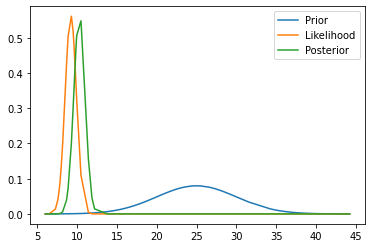

In [231]:
fig,ax = plt.subplots()

#Plotting prior
ax.plot(x,prior(),label = "Prior")

#Plotting Likelihood
ax.plot(x,likelihood(),label = "Likelihood")

#Plotting Posterior
ax.plot(x,c_po,label = "Posterior")
ax.legend()

# Q2(b)
## &emsp;Implement the Metropolis algorithm from the lecture slides to estimate the posterior distributiongiven the same prior and data and show that it converges to the
## &emsp;analytic posterior by plotting ahistogram of samples from the distribution alongside the analytic posterior distribution.  Assumewhatever SD (width) you want for the 
## &emsp;proposal distribution.

$ 
\large \theta \text{ : the parameter for which we are simulating the distribution} \\ \text{Y : the random variable that depends on }\theta \\ \text{y : realizations of the random variable Y (our sample) } \\ f_\theta(\theta)\text{ : our prior (updated each step with value from the previous period)} \\ f_{Y|\theta}{y|\theta} \text{ : our likelihood} \\ f_{\theta|Y}{\theta|y} \text{ : out posterior} \propto f_\theta(\theta)\;*\;f_{Y|\theta}{y|\theta} \\ J_\theta(\theta|\theta_{t-1}) \text{ : our jumping distribution, used to generate proposed new values of }\theta 
$
$ \LARGE \text{The steps for Metropolis-Hastings Algorithm:} \\$
&emsp;$ \Large\text{Step 1:} \\$
&emsp;&emsp;$ \large \text{Choose a starting value : }\theta_{t-1}\text{. At } t=1,\; \theta_{t-1} \text{ is our starting prior value for }\theta \\$
&emsp;$ \Large\text{Step 2:} \\$
&emsp;&emsp;$ \large\text{Generate a proposal for period }t,\theta_t^* \text{ by sampling from the jumping distribution }J(\theta|\theta_{t-1}). \\$
&emsp;$ \Large\text{Step 2:} \\$
&emsp;&emsp;$ \large\text{Find the ratio of the posterior of the proposal to the posterior of the prior value: } \\$
$
\LARGE r=\frac{\frac{f_{\theta|Y}(\theta_t^*|y)}{J_\theta(\theta_t^*|\theta_{t-1})}}{\frac{f_{\theta|Y}(\theta_{t-1}|y)}{J_\theta(\theta_{t-1}|\theta_t^*)}}
$
&emsp;&emsp;$ \large\text{For symmetric jumping distributions, }J_\theta(\theta_t^*|\theta_{t-1})\;=\;J_\theta(\theta_{t-1}|\theta_t^*) \text{, so}$
$
\LARGE r=\frac{f_\theta(\theta_t^*)f_{Y|\theta}(y|\theta_t^*)}{f_\theta(\theta_{t-1})f_{Y|\theta}(y|\theta_{t-1})}
$
&emsp;$ \Large\text{Step 4:} \\$
&emsp;&emsp;$ \large\text{If }r>a,\;\theta_t = \theta_t^*\text{ (we accept the proposed value). This has probability } min(r,1)\\$
&emsp;&emsp;$ \large\text{If }r\leq a,\;\theta_t = \theta_{t-1}\text{ (we reject the proposed value and use the prior value). This has probability } 1 - min(r,1)\\$
&emsp;$ \Large\text{Step 5:} \\$
&emsp;&emsp;$ \large\text{Repeat until we reach the number of max number of iterations} $

In [238]:
#Initiating list of points to plot in histogram
theta_lst = []

#Initiating theta_0 as a random number(starting value)
theta_0 = np.random.normal(25,5,1)

#Running the loop for 100000 times
for i in range(100000):

    #Getting new proposed value in theta_1
    theta_1 = np.random.normal(theta_0,0.1,1)
    
    #Calculating the numerator term of r
    p_n = (1/np.sqrt(2*np.pi*(sd_pr**2)))*np.exp(-(((theta_1 - mn_pr)**2)/(2*(sd_pr**2))))
    l_n = (1/np.sqrt(2*np.pi*(sd_lklhd)))*np.exp(-(((mn_lklhd - theta_1)**2)/(2*(sd_lklhd))))
    
    #Calculating the denominator term of r
    p_d = (1/np.sqrt(2*np.pi*(sd_pr**2)))*np.exp(-(((theta_0 - mn_pr)**2)/(2*(sd_pr**2))))
    l_d = (1/np.sqrt(2*np.pi*(sd_lklhd)))*np.exp(-(((mn_lklhd - theta_0)**2)/(2*(sd_lklhd))))
    
    #Calculating r
    r = (p_n*l_n)/(p_d*l_d)
    
    #Getting a random number between 0 and 1
    rand_no = np.random.rand()
    
    #Checking if proposed value has to be accepted or rejected
    if r>rand_no:
        theta_0 = theta_1
        theta_lst.append(float(theta_0))

## &emsp;Plotting Graphs

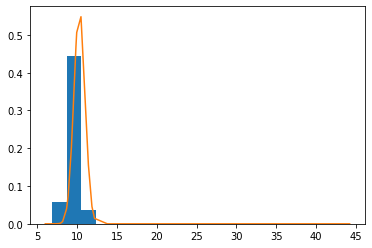

In [239]:
#Plotting the Histogram for the theta values from Metropolis Algorithm
plt.hist(theta_lst,density=True)

#Plotting the Posterior obtained in Q2(a)
plt.plot(x,c_po)

# Q2(c)
## &emsp;How does the speed of convergence of the sampling depend on the proposal width? Is there anoptimal proposal width that would work best? Demonstrate the 
## &emsp;consequences of using sub-optimalproposal width and terminating sampling too soon.

## &emsp;&emsp;Writing Convergence function to try to converge the calculation of theta early

In [240]:
#Defining Convergence function which takes k(number of latest thetas considered) and diff(maximum difference )
def conv(k,diff):  
    #Initiating list of points to plot in histogram
    theta_lst = []

    #Initiating theta_0 as a random number(starting value)
    theta_0 = np.random.normal(25,5,1)

    #Running the loop for 100000 times
    for i in range(100000):

        #Getting new proposed value in theta_1
        theta_1 = np.random.normal(theta_0,0.1,1)
        
        #Calculating the numerator term of r
        p_n = (1/np.sqrt(2*np.pi*(sd_pr**2)))*np.exp(-(((theta_1 - mn_pr)**2)/(2*(sd_pr**2))))
        l_n = (1/np.sqrt(2*np.pi*(sd_lklhd)))*np.exp(-(((mn_lklhd - theta_1)**2)/(2*(sd_lklhd))))
        
        #Calculating the denominator term of r
        p_d = (1/np.sqrt(2*np.pi*(sd_pr**2)))*np.exp(-(((theta_0 - mn_pr)**2)/(2*(sd_pr**2))))
        l_d = (1/np.sqrt(2*np.pi*(sd_lklhd)))*np.exp(-(((mn_lklhd - theta_0)**2)/(2*(sd_lklhd))))
        
        #Calculating r
        r = (p_n*l_n)/(p_d*l_d)
        
        #Getting a random number between 0 and 1
        rand_no = np.random.rand()
        
        #Checking if proposed value has to be accepted or rejected
        if r>rand_no:
            theta_0 = theta_1
            theta_lst.append(float(theta_0))
            
        if i>k:
            #Here we take the absolute difference between the mean of latest k theta values and the current theta value to check for convergence
            if np.absolute(theta_0 - np.mean(theta_lst[len(theta_lst)-k:len(theta_lst)])) >= diff:
                break
    return theta_lst

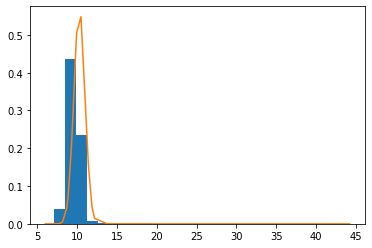

In [241]:
#Plotting the Histogram for the theta values from Metropolis Algorithm
plt.hist(conv(1000,2.5),density=True)

#Plotting the Posterior obtained in Q2(a)
plt.plot(x,c_po)

***